In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import scipy.stats as stats

In [2]:
filepath = '/home/docboy/Desktop/Option_Pricing/images/'

# Q-Q Plot

In [4]:
nfty = pd.read_csv('/home/docboy/Desktop/Option_Pricing/datasets/INDEXVALUE_NIFTY50_2015_2018_combined_raw.csv')
bnfty = pd.read_csv('/home/docboy/Desktop/5th Year/Option Pricing Work/Work/INDEXVALUE_BANKNIFTY_2015_2018_combined_raw.csv')

In [5]:
k = np.log(nfty.loc[:, 'Close']/nfty.loc[:, 'Close'].shift(1) )
k = k.dropna()

In [6]:
# Analysis on BANKNIFTY Close Price
j = np.log(bnfty.loc[:, 'Close']/bnfty.loc[:, 'Close'].shift(1))
j = j.dropna()

In [29]:
?plt.legend

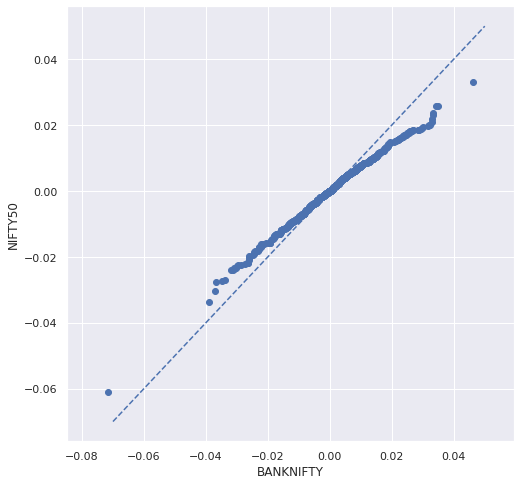

In [37]:
plt.rcParams['figure.figsize'] = [8, 8]
# Quantile-quantile plot
x = np.linspace(-0.07,0.05,100)
y = x
sns.set()
plt.scatter(np.sort(j), np.sort(k))
plt.xlabel('BANKNIFTY')
plt.ylabel('NIFTY50')
plt.plot(x,y, '--', label = 'Y=X')
plt.savefig(filepath + 'Q-Q Plot NF50 BNF.pdf', format = 'pdf')
plt.show()

# ECDF Plots

In [246]:
# Nifty 50
cp = pd.read_csv('/home/docboy/Desktop/Option_Pricing/datasets/CP.csv')

In [247]:
def ecdf(data):
    """ Compute ECDF """
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)

In [248]:
k = np.random.normal(0, 2, 100000)
x, y = ecdf(k)

In [249]:
cp_ser = cp.sort_values(by = '-1.000000000000000000e+00')
cp_ser[len(cp_ser)] = cp_ser.iloc[-1]
cum_dist = np.linspace(0.,1.,len(cp_ser))
ser_cdf = pd.Series(cum_dist, index=cp_ser)


In [250]:
cp1 = cp_ser.reset_index(drop = True)
cp1 = cp1[cp1["-1.000000000000000000e+00"] >= -2]
low_val = cp1.index[0]
y1 = low_val/len(cp_ser)


cp2 = cp_ser.reset_index(drop = True)
cp2 = cp2[cp2["-1.000000000000000000e+00"] <= 2]
high_val = cp2.index[-1]
y2 = high_val/len(cp_ser)

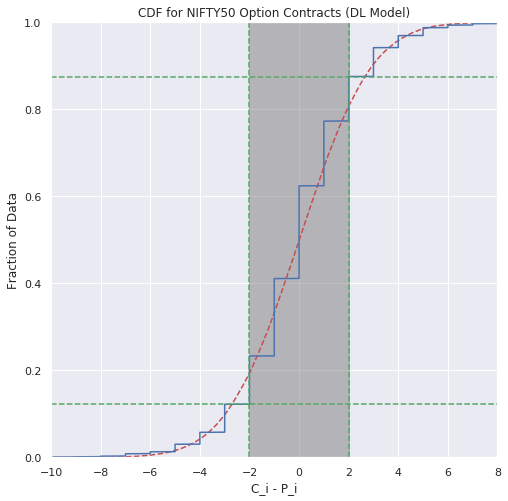

In [254]:
plt.rcParams['figure.figsize'] = [8, 8]
k = np.random.normal(0, dev, 100000)
x, y = ecdf(k)

plt.plot(x, y, '--r')
plt.plot(ser_cdf, 'b')
plt.xlabel("C_i - P_i")
plt.ylabel("Fraction of Data")
axes = plt.gca()
axes.set_xlim([-10,8])
axes.set_ylim([0,1])
plt.axvline(x=2, c = 'g', ls='--')
plt.axvline(x=-2, c = 'g', ls='--')
plt.axhline(y = y1, c = 'g', ls = '--')
plt.axhline(y = y2, c = 'g', ls = '--')
axes.axvspan(-2, 2, alpha=0.5, color='grey')
plt.title("CDF for NIFTY50 Option Contracts (DL Model)")
plt.savefig(filepath + 'ECDF_NF50.pdf', format = 'pdf')
plt.show()

# Close/K plot

In [126]:
data = pd.read_csv('/home/docboy/Desktop/Option_Pricing/datasets/NIFTY50_feature_set_ECDF_complete.csv')

In [127]:
# data=data.loc[data['ttm']>3,:]
# data=data.loc[data['ttm']<=45,:]
# bound=np.percentile(data['percentage'],100)
# data=data.loc[data['percentage']<bound]

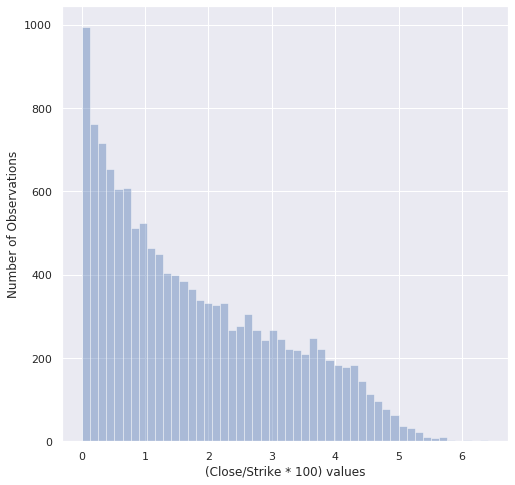

In [132]:
# original Data
sns.distplot(data["percentage"], kde = False, bins =50)
plt.xlabel("(Close/Strike * 100) values")
plt.ylabel("Number of Observations")
plt.savefig(filepath + 'percentage_hist.pdf', format = 'pdf')
plt.show()

# EM vs Bins Plot

In [51]:
data = pd.read_csv('/home/docboy/Desktop/Option_Pricing/datasets/em_vs_bins.csv')

In [52]:
# data["Bins"] = 5/data["Bins"]
# data = data.sort_values(by = "Bins")

In [74]:
data['Scale'] = 5/data['Bins']
ticks = round(data["Scale"], 3)
pos = data["Bins"]

Text(0.5, 34.15224596215562, 'Bin width')

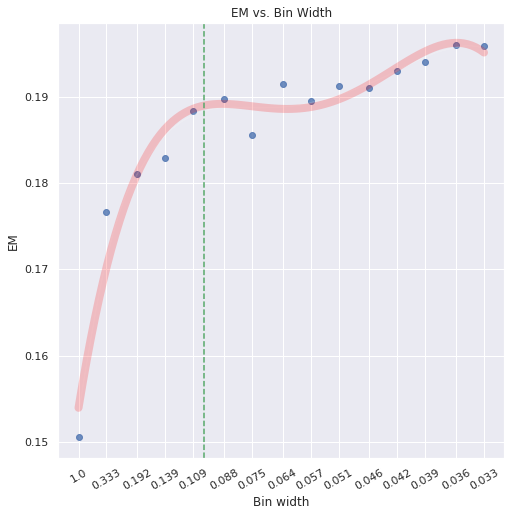

In [99]:
plt.rcParams['figure.figsize'] = [8, 8]
sns.set()
sns.regplot(x = "Bins", y = "EM", data = data, order =4.8 , ci=0, truncate = True, line_kws = {'alpha' : 0.2,
                                                                                              'color' : 'red',
                                                                                              'lw' : 8})
plt.title('EM vs. Bin Width')
axes = plt.gca()
plt.xticks(pos, ticks, rotation = 30)


# for i, txt in enumerate(data["EM"]):
#     axes.annotate(round(txt,3), (data.loc[i, "Bins"], data.loc[i, "EM"]), ha = "right")

# plt.yticks(data["EM"], rotation = 30)
# axes.set_xlim([1.02, 0])
plt.axvline(x=50, c = 'g', ls='--')
plt.savefig(filepath + 'Em_vs_numberof_BINS.pdf', format = 'pdf')
plt.xlabel("Bin width")

# Volatility vs EM plot for XGB and DL

In [114]:
data = pd.read_csv('/home/docboy/Desktop/Option_Pricing/datasets/ttm_filter_param_0.04_NIFTY50_2015_2018_new.csv')

In [115]:
data

,Change in OI,Close,Date,Expiry,High,LTP,Low,No. of contracts,Open,Open Int,Settle Price,Strike Price,Underlying Value,ttm
0,350.0,186.25,2015-01-01,2015-03-26,186.25,186.25,174.35,102.0,175.00,48300.0,186.25,8600.0,8284.00,84.0
1,-300.0,234.35,2015-01-01,2015-03-26,237.00,236.00,211.15,252.0,216.35,467350.0,234.35,8500.0,8284.00,84.0
2,-250.0,449.60,2015-01-01,2015-02-26,456.95,450.00,431.95,51.0,436.00,118000.0,449.60,8000.0,8284.00,56.0
3,900.0,299.90,2015-01-01,2015-02-26,305.60,300.65,276.10,208.0,277.00,47150.0,299.90,8200.0,8284.00,56.0
4,1300.0,370.00,2015-01-01,2015-02-26,376.00,370.00,345.00,105.0,348.25,3900.0,370.00,8100.0,8284.00,56.0
5,1150.0,233.95,2015-01-01,2015-02-26,249.20,237.55,217.40,232.0,221.05,219225.0,233.95,8300.0,8284.00,56.0
6,125.0,344.10,2015-01-01,2015-03-26,352.20,345.00,329.05,62.0,329.45,151575.0,344.10,8300.0,8284.00,84.0
7,275.0,403.40,2015-01-01,2015-03-26,405.00,405.00,375.25,14.0,390.00,5175.0,403.40,8200.0,8284.00,84.0
8,450.0,719.00,2015-01-01,2015-12-31,719.00,719.00,709.80,17.0,709.90,190100.0,719.00,8500.0,8284.00,364.0
9,-100.0,284.00,2015-01-01,2015-03-26,284.00,284.00,270.70,16.0,271.30,52175.0,284.00,8400.0,8284.00,84.0


In [123]:
data['pct'] = data["Close"]/data["Strike Price"]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa7ea165860>]],
      dtype=object)

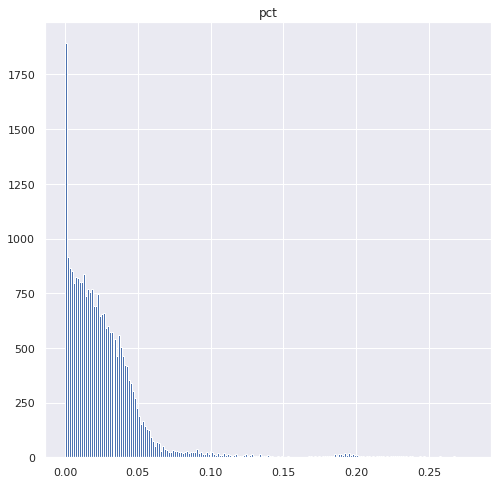

In [124]:
data.hist('pct', bins = 205)
